In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [161]:
df = pd.read_csv('dataset.csv')

In [162]:
df.head()

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
0,316,2,112,68,22,94,34.1,0.315,26,0
1,25,11,143,94,33,146,36.6,0.254,51,1
2,710,2,93,64,32,160,38.0,0.674,23,1
3,658,1,120,80,48,200,38.9,1.162,41,0
4,542,3,128,72,25,190,32.4,0.549,27,1


In [163]:
X = df.iloc[:,1:-1]
Y = df.iloc[:,-1]

In [164]:
X.head()

,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age
0,2,112,68,22,94,34.1,0.315,26
1,11,143,94,33,146,36.6,0.254,51
2,2,93,64,32,160,38.0,0.674,23
3,1,120,80,48,200,38.9,1.162,41
4,3,128,72,25,190,32.4,0.549,27


In [165]:
X.shape

(614, 8)

In [166]:
Y.head()

0    0
1    1
2    1
3    0
4    1
Name: diabetes, dtype: int64

In [167]:
from tensorflow import keras


In [168]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,Y, test_size = 0.1 , random_state=42)

In [169]:
model1 = keras.Sequential()
model1.add(keras.layers.Dense(1, input_shape=(8,), activation='sigmoid'))
model1.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

In [170]:
history = model1.fit(X, Y, verbose=0, epochs=200)

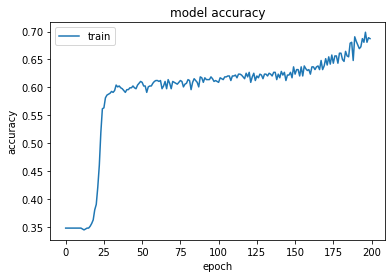

In [171]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


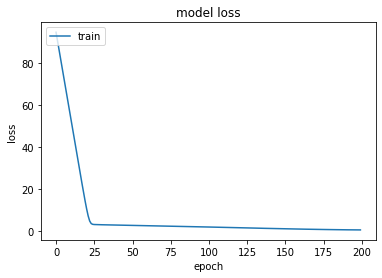

In [172]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [186]:
model_adv = keras.Sequential()
model_adv.add(keras.layers.Dense(64, input_shape=(8,), activation='relu'))
model_adv.add(keras.layers.Dense(64, activation='relu'))
model_adv.add(keras.layers.Dense(64, activation='relu'))
model_adv.add(keras.layers.Dense(1, activation='sigmoid'))

model_adv.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

history_adv = model_adv.fit(X_train, y_train, verbose=0, epochs=150)

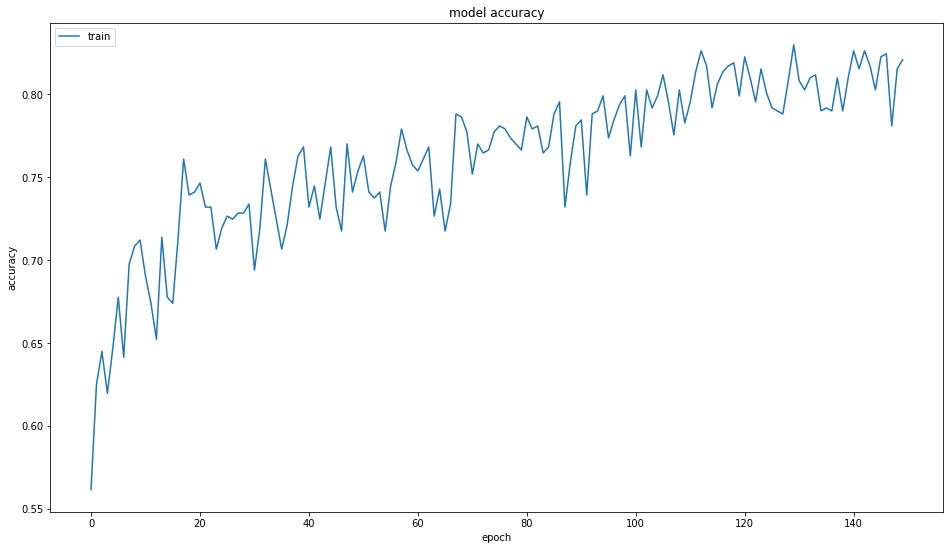

In [191]:
plt.figure(figsize=(16, 9))
plt.plot(history_adv.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

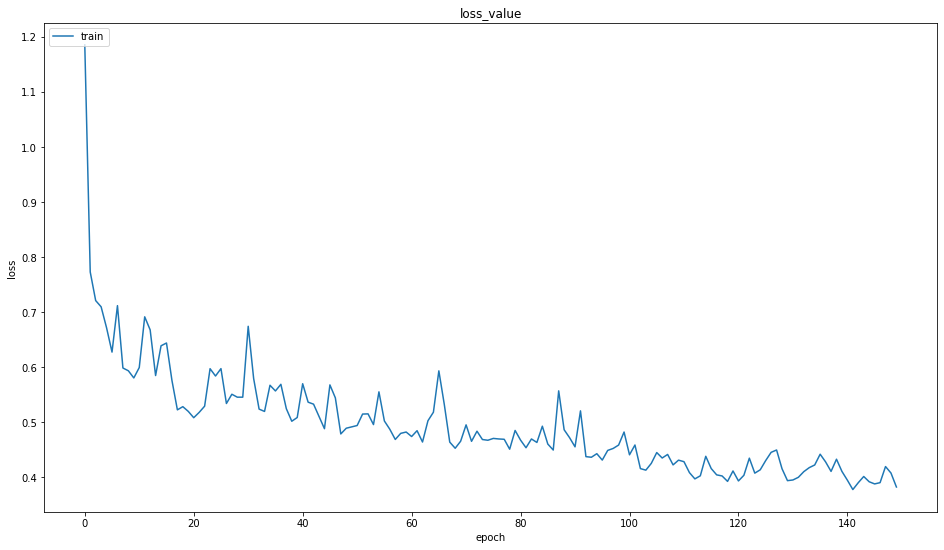

In [192]:
plt.figure(figsize=(16, 9))
plt.plot(history_adv.history['loss'])
plt.title('loss_value')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [184]:
y_pred = model_adv.predict(X_test)

In [179]:
a = np.where(y_pred > 0.5, 1, 0)
a


array([[0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1]])